As a data scientist, you must perform the following steps on the enclosed data:
1. Data wrangling
2. Data analysis
3. Data visualization
4. Report generation

In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the dataset
sales = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [4]:
# Display the first few rows of the dataset
sales.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


The dataset contains sales data for different states, groups, and time periods in the fourth quarter of 2020.

In [6]:
#misssing values check
sales.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [7]:
sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


The data shows a wide range of unit sales, from 2 to 65.
Sales values vary significantly, with an average around 45,000.

In [9]:
sales.info

<bound method DataFrame.info of              Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]>

Dropping Null Values

 1.  If the dataset is large and the number of missing values is relatively small(<10%)

 2. If the missing value percentage is greater than 10% but less than 70% we do a missing value imputation.

Filling Missing Values:

Imputation:

Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode of the column.

     1.Mean is used if the distribution is distributed normally.

     2.Median when the data is skewed

     3.Mode is used for categorical data

    Here there is no missing values.

### Data Normalization 

In [12]:
#unique categories for group, state and time:
print(sales.Time.unique())
print(sales.Group.unique())
print(sales.State.unique())

[' Morning' ' Afternoon' ' Evening']
[' Kids' ' Men' ' Women' ' Seniors']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']


In [13]:
sales_numeric = sales[['Unit','Sales']]
sales_numeric

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500
...,...,...
7555,14,35000
7556,15,37500
7557,15,37500
7558,11,27500


In [14]:
normalize = MinMaxScaler()

In [15]:
normalized_data = normalize.fit_transform(sales_numeric)
normalized_data

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

Data normalization ensures fair comparisons across different features.

In [17]:
#create a copy with scaled data
sales_copy = sales.copy()

In [18]:
#x-xmin/xmax-xmin
sales_copy['Unit'] = (sales_copy['Unit']-sales_copy['Unit'].min())/(sales_copy['Unit'].max()-sales_copy['Unit'].min())
sales_copy['Sales'] = (sales_copy['Sales']-sales_copy['Sales'].min())/(sales_copy['Sales'].max()-sales_copy['Sales'].min())

Data normalization scales the Unit and Sales values between 0 and 1, ensuring that variables with different ranges contribute equally to the analysis. This prevents attributes with larger ranges from dominating the results.

In [20]:
sales_copy.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [21]:
sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [22]:
#Identify the group with the highest sales and the group with the lowest sales based on the data provided.
## Highest & Lowest sales by group:
highest_sales_group = sales_copy.groupby(['Group']).sum('Sales').idxmax()
lowest_sales_group = sales_copy.groupby(['Group']).sum('Sales').idxmin()

In [23]:
highest_sales_group

Unit      Men
Sales     Men
dtype: object

In [24]:
lowest_sales_group

Unit      Seniors
Sales     Seniors
dtype: object

The Men's category recorded the highest sales.

The Seniors category had the lowest sales figures.

In [26]:
## Highest & Lowest sales by states:
highest_sales_state = sales_copy.groupby(['State']).sum('State').idxmax()
lowest_sales_state = sales_copy.groupby(['State']).sum('State').idxmin()

In [27]:
print(highest_sales_state)
print(lowest_sales_state)

Unit      VIC
Sales     VIC
dtype: object
Unit      WA
Sales     WA
dtype: object


Victoria (VIC) had the highest sales.

Western Australia (WA) had the lowest sales.

In [29]:
#Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted:
print(sales_copy.Date.unique())

['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 '11-Dec-2020' '12-Dec-2020' '13-

In [30]:
sales_copy['Date']=pd.to_datetime(sales_copy['Date'])

In [31]:
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   float64       
 5   Sales   7560 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 354.5+ KB


In [32]:
dates = sales_copy['Date']

df_unit_and_sales = sales_copy.groupby(by='Date',axis='index').sum(numeric_only=True)
df_unit_and_sales

/var/folders/cs/0l3l57d154d6mvr8z8xjjkz80000gn/T/ipykernel_4923/3534277921.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_unit_and_sales = sales_copy.groupby(by='Date',axis='index').sum(numeric_only=True)


,Unit,Sales
Date,,
2020-10-01,20.952381,20.952381
2020-10-02,20.920635,20.920635
2020-10-03,22.031746,22.031746
2020-10-04,20.952381,20.952381
2020-10-05,21.857143,21.857143
...,...,...
2020-12-26,27.269841,27.269841
2020-12-27,26.777778,26.777778
2020-12-28,26.507937,26.507937


In [33]:
df_October = df_unit_and_sales.loc['2020-10-01':'2020-10-30']
df_October.shape

(30, 2)

In [34]:
df_November = df_unit_and_sales.loc['2020-11-01':'2020-11-30']
df_November.shape

(30, 2)

In [35]:
df_December = df_unit_and_sales.loc['2020-12-01':'2020-12-30']
df_December.shape

(30, 2)

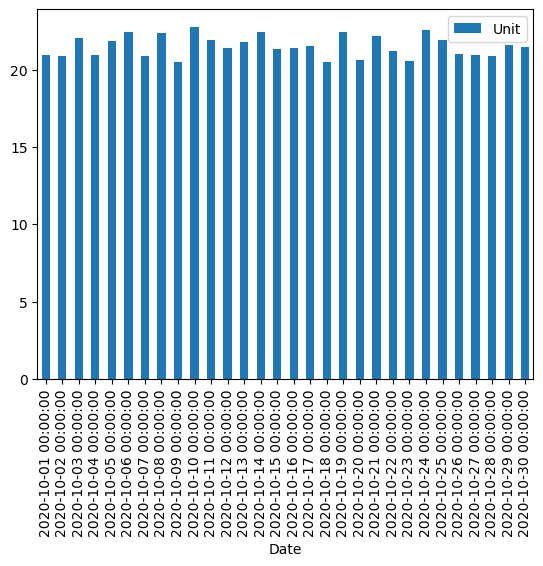

In [36]:
#Analyzing monthly sales:
df_October.plot.bar(y='Unit')
plt.show()

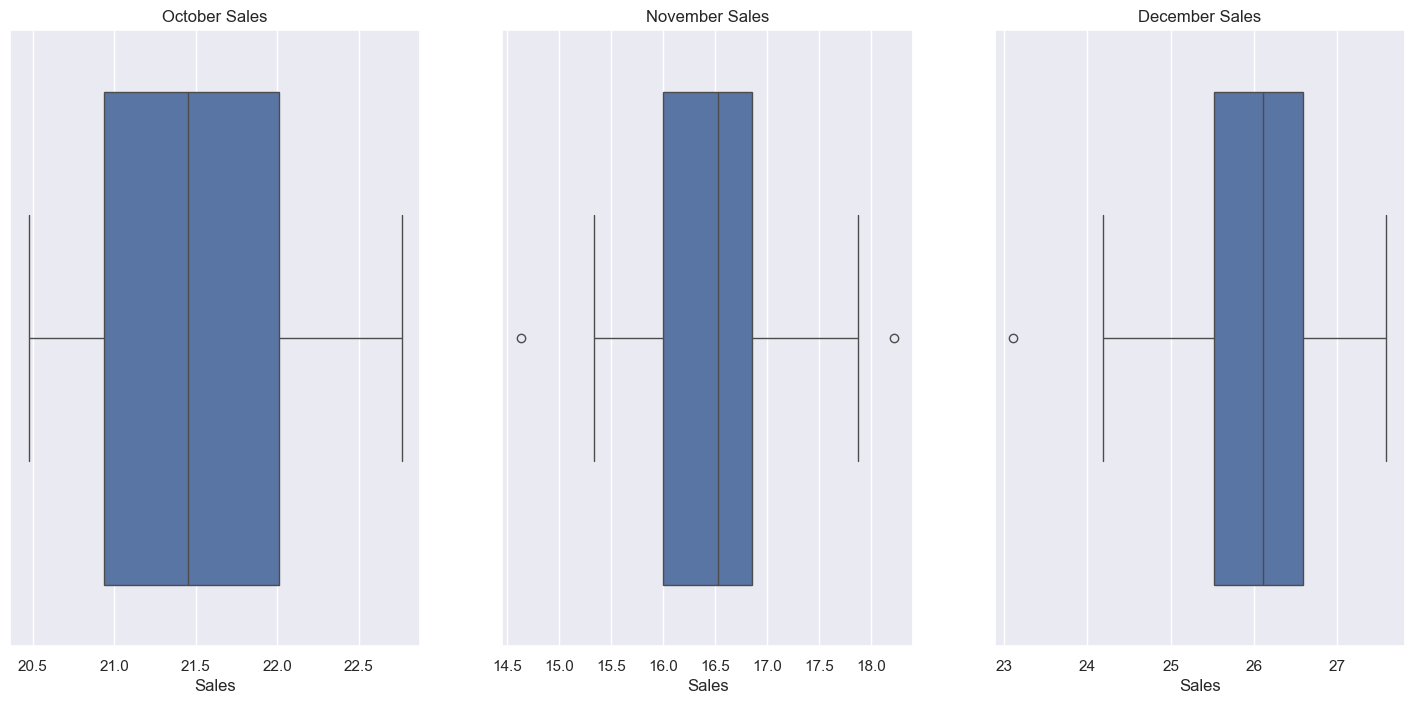

In [37]:
### comparing over 3 months:
sns.set(rc={'figure.figsize':(18,8)})
fig,axes = plt.subplots(1,3)

bp_October = sns.boxplot(x='Sales',data=df_October,ax=axes[0])
bp_November = sns.boxplot(x='Sales',data=df_November,ax=axes[1])
bp_December = sns.boxplot(x='Sales',data=df_December,ax=axes[2])

bp_October.set(title='October Sales')
bp_November.set(title='November Sales')
bp_December.set(title='December Sales')

plt.show()

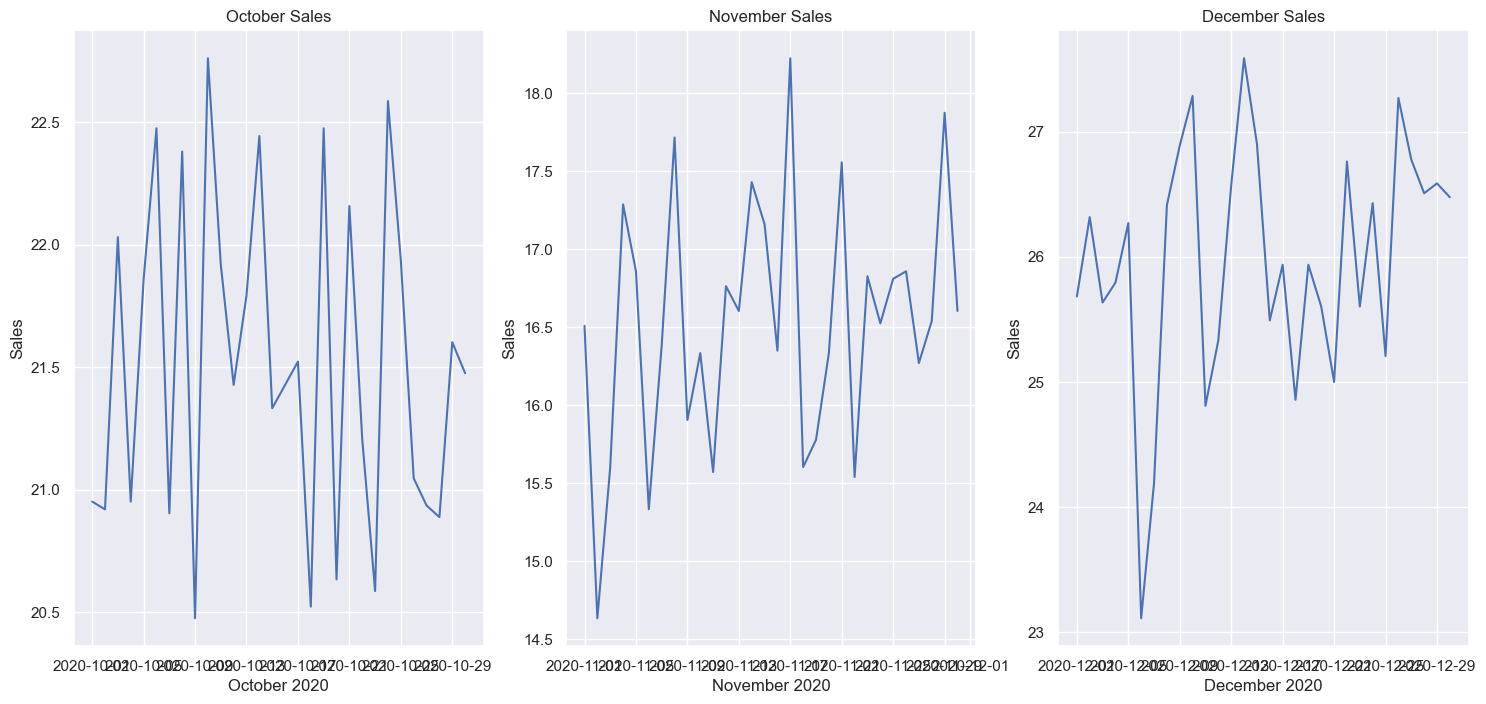

In [38]:
### comparing over 3 months:
sns.set(rc={'figure.figsize':(18,8)})
fig,axes = plt.subplots(1,3)

lp_October = sns.lineplot(x=df_October.index,y='Sales',data=df_October,ax=axes[0])
lp_November = sns.lineplot(x=df_November.index,y='Sales',data=df_November,ax=axes[1])
lp_December = sns.lineplot(x=df_December.index,y='Sales',data=df_December,ax=axes[2])

lp_October.set(xlabel='October 2020',title='October Sales')
lp_November.set(xlabel='November 2020',title='November Sales')
lp_December.set(xlabel='December 2020',title='December Sales')

plt.show()

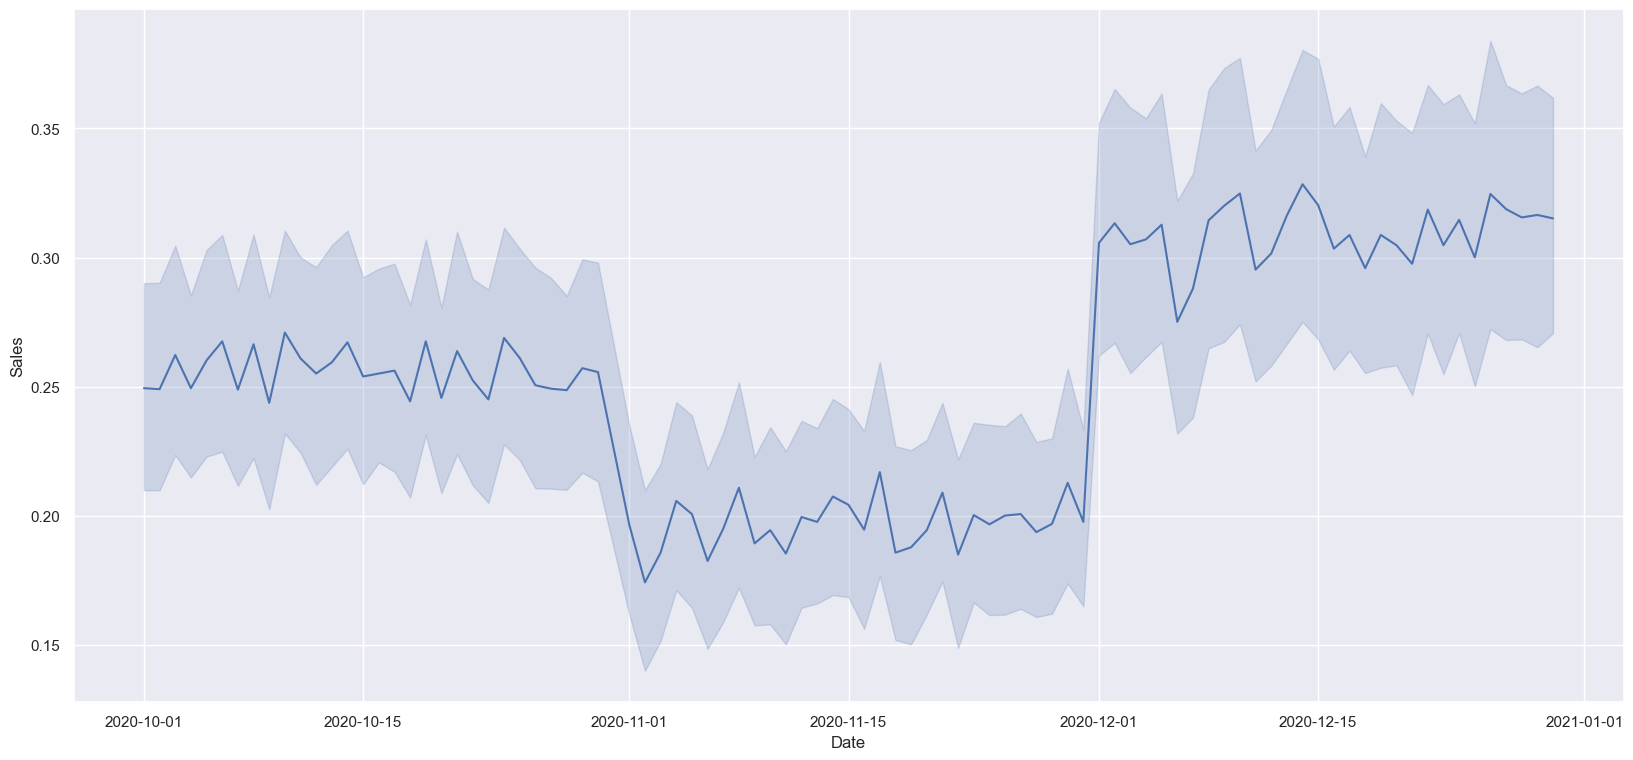

In [39]:
## To Check the overall trend in the last quarter of 2020:

sns.set(rc={'figure.figsize':(20,9)})
sns.lineplot(x='Date',y='Sales',data=sales_copy)
plt.show()

### resampling Method: We use this method when we work with time varying data. The most commonly used frequencies we use to get a unique sampling distribution are W:weekly, Q:quarterly. M:Monthly, SM:semi quartly

In [41]:
weekly_data = sales_copy.resample('W',on='Date')['Sales'].sum()
weekly_data

Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,0.190476,0.190476
7556,2020-12-30,Evening,TAS,Kids,0.206349,0.206349
7557,2020-12-30,Evening,TAS,Men,0.206349,0.206349
7558,2020-12-30,Evening,TAS,Women,0.142857,0.142857


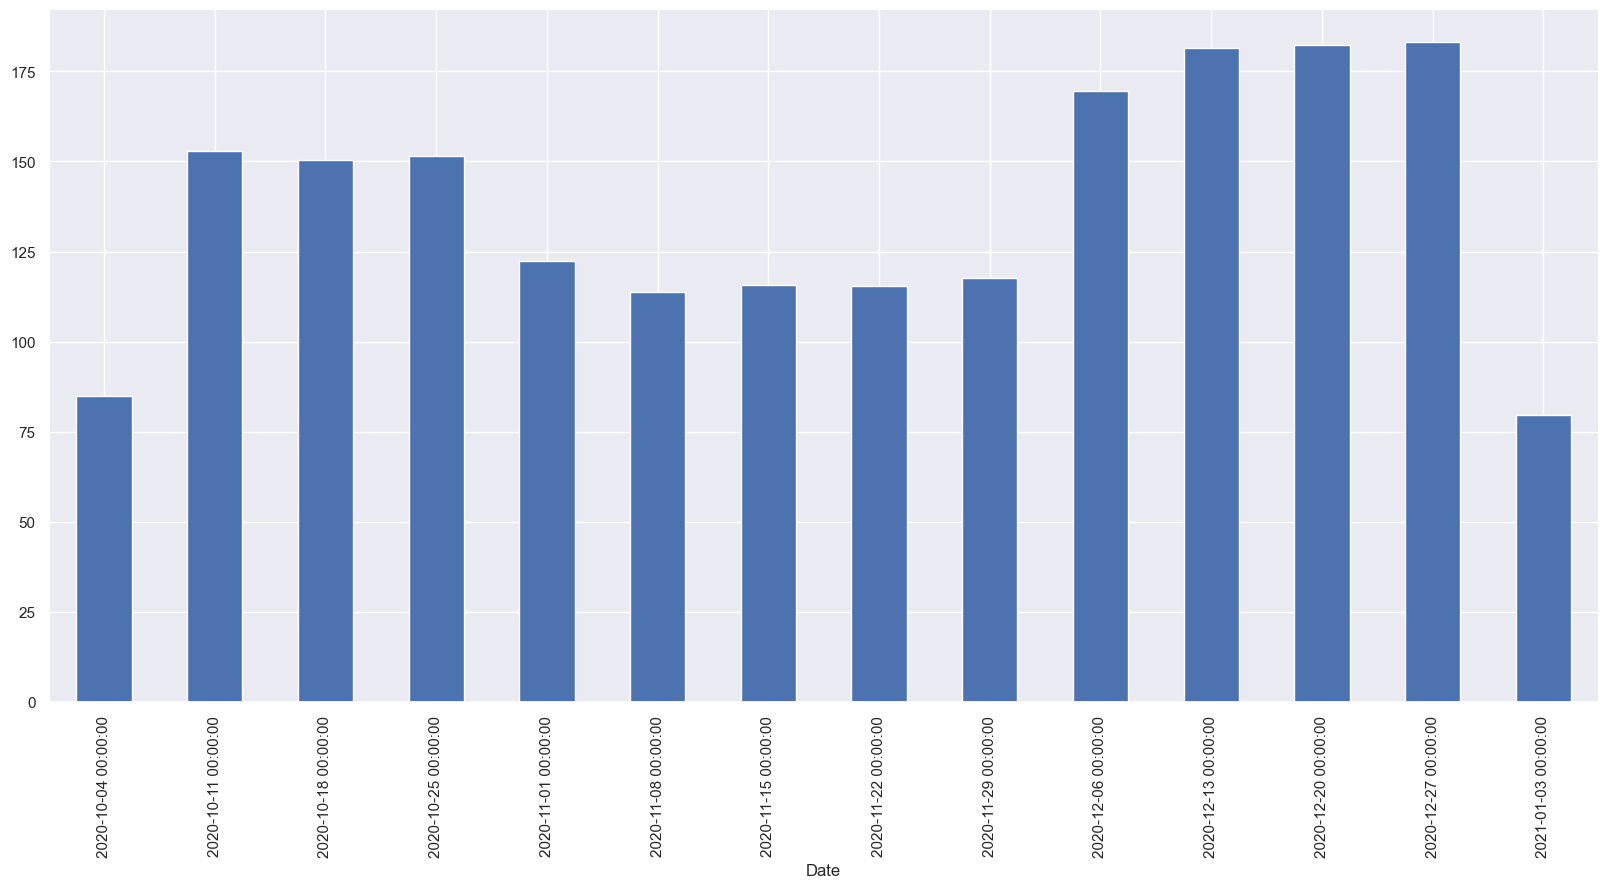

In [42]:
sales_copy.resample('W',on='Date')['Sales'].sum().plot(kind='bar')
sales_copy

In [43]:
monthly_data = sales_copy.resample('ME',on='Date')['Sales'].sum()
monthly_data

Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: ME, Name: Sales, dtype: float64

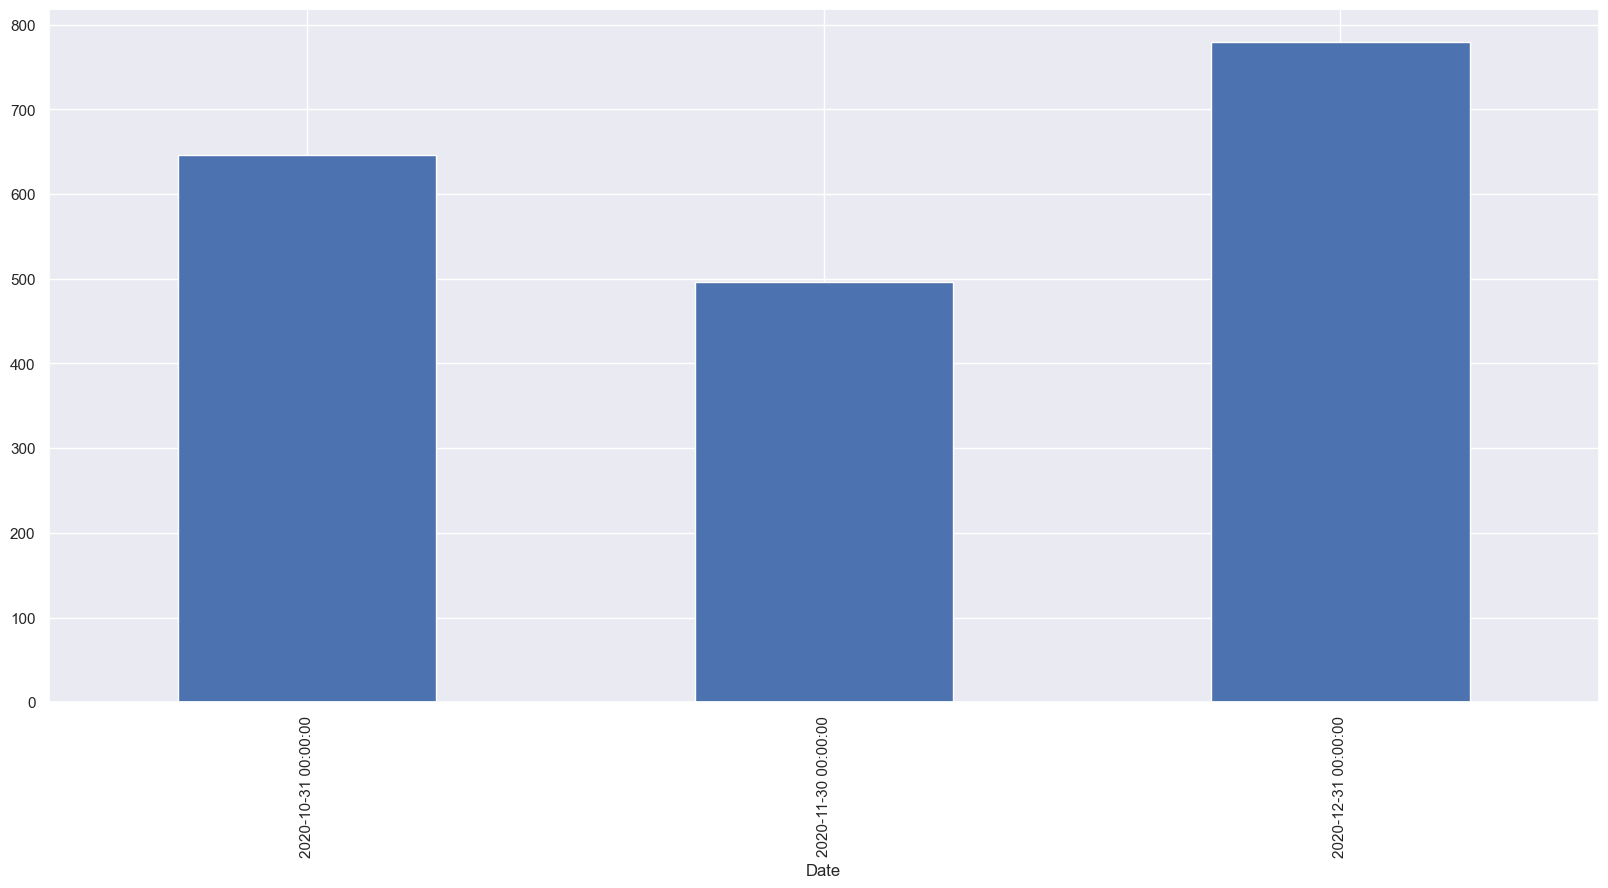

In [44]:
sales_copy.resample('ME',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()

In [45]:
quaterly_sales = sales_copy.resample('Q',on='Date')['Sales'].sum()
quaterly_sales

/var/folders/cs/0l3l57d154d6mvr8z8xjjkz80000gn/T/ipykernel_4923/2034671758.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quaterly_sales = sales_copy.resample('Q',on='Date')['Sales'].sum()


Date
2020-12-31    1920.650794
Freq: QE-DEC, Name: Sales, dtype: float64

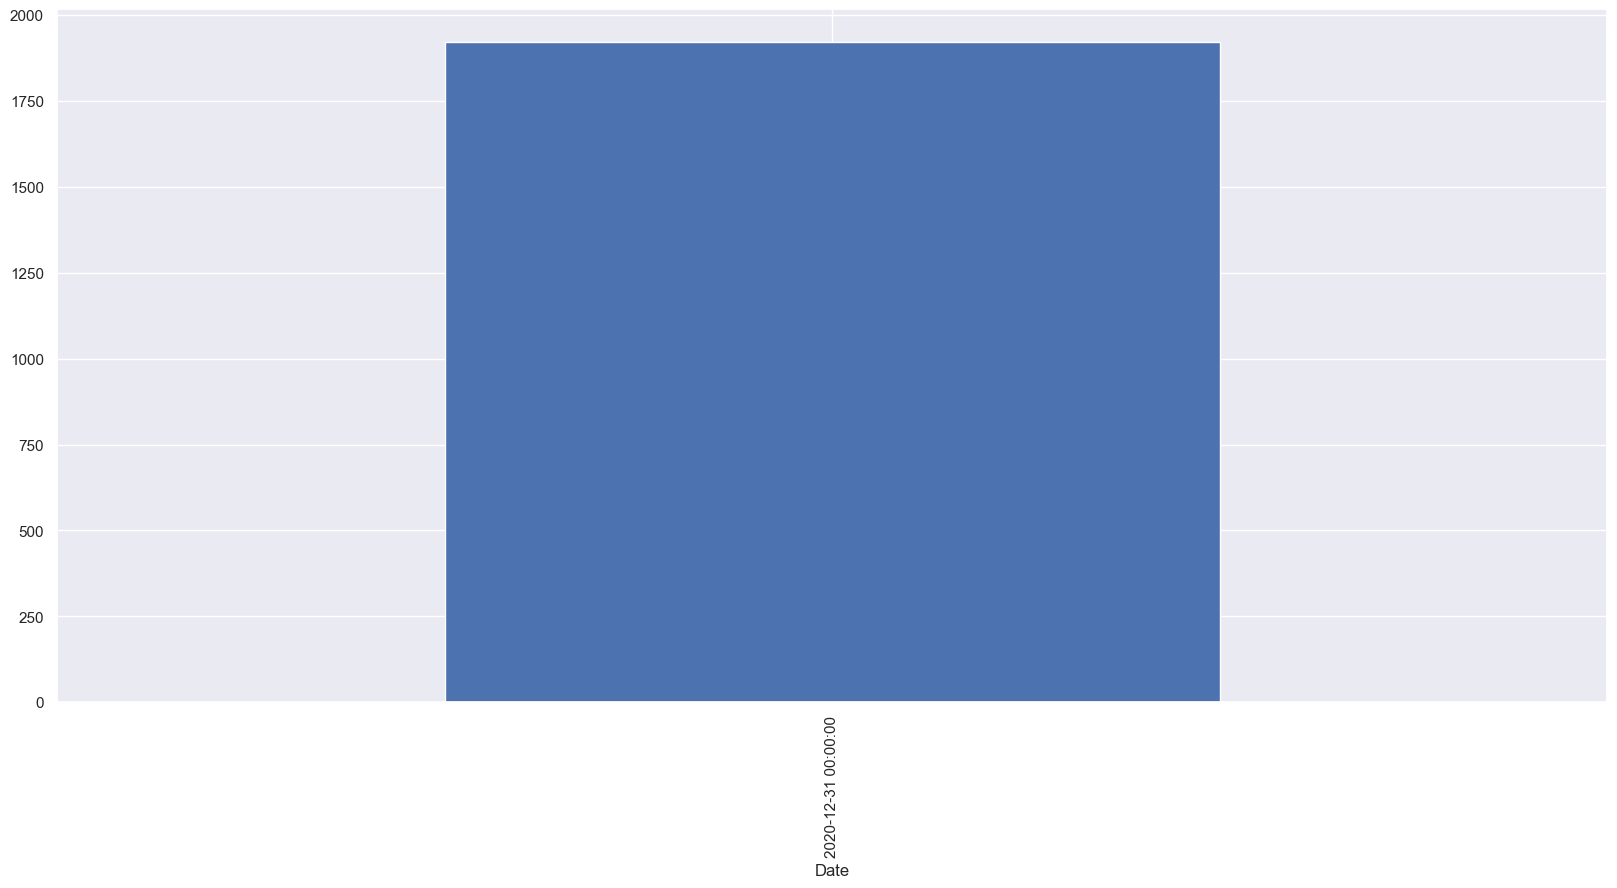

In [46]:
sales_copy.resample('QE',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()

#### State-wise analysis for different demographic groups(kids, women,men,seniors)

<function matplotlib.pyplot.show(close=None, block=None)>

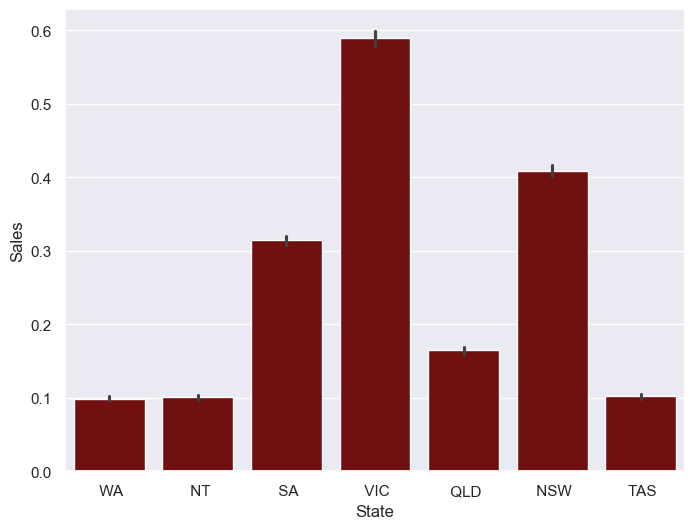

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x=sales_copy['State'],y=sales_copy['Sales'],data=sales_copy,color='maroon')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

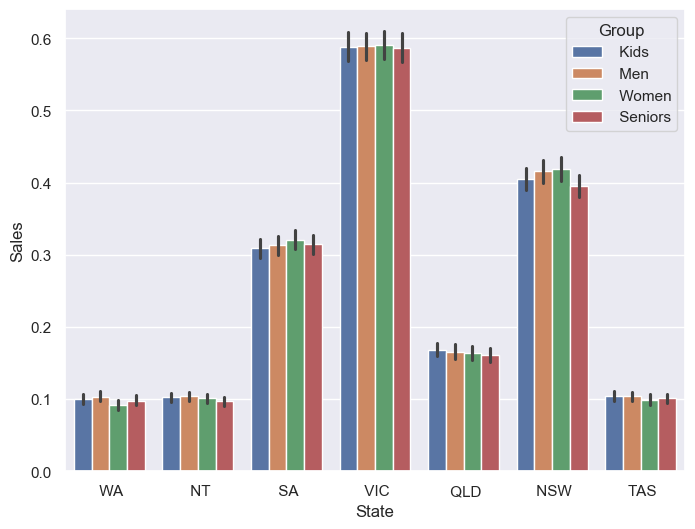

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(x=sales_copy['State'],y=sales_copy['Sales'],data=sales_copy,hue='Group')
plt.show

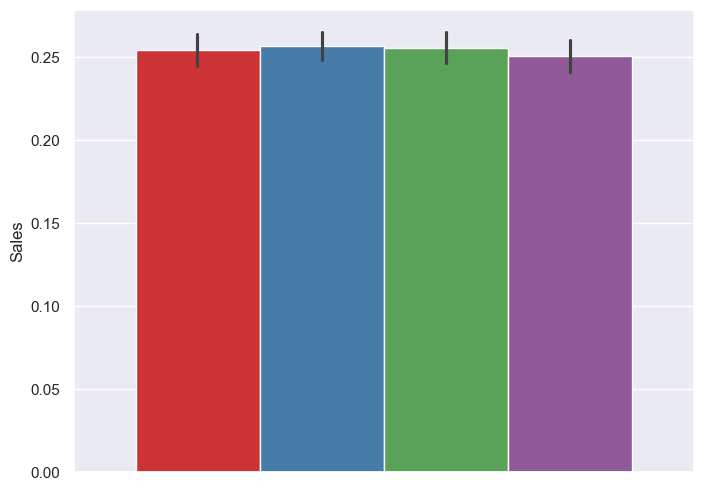

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(hue=sales_copy['Group'],y=sales_copy['Sales'],data=sales_copy,palette='Set1',legend=False)
plt.show()

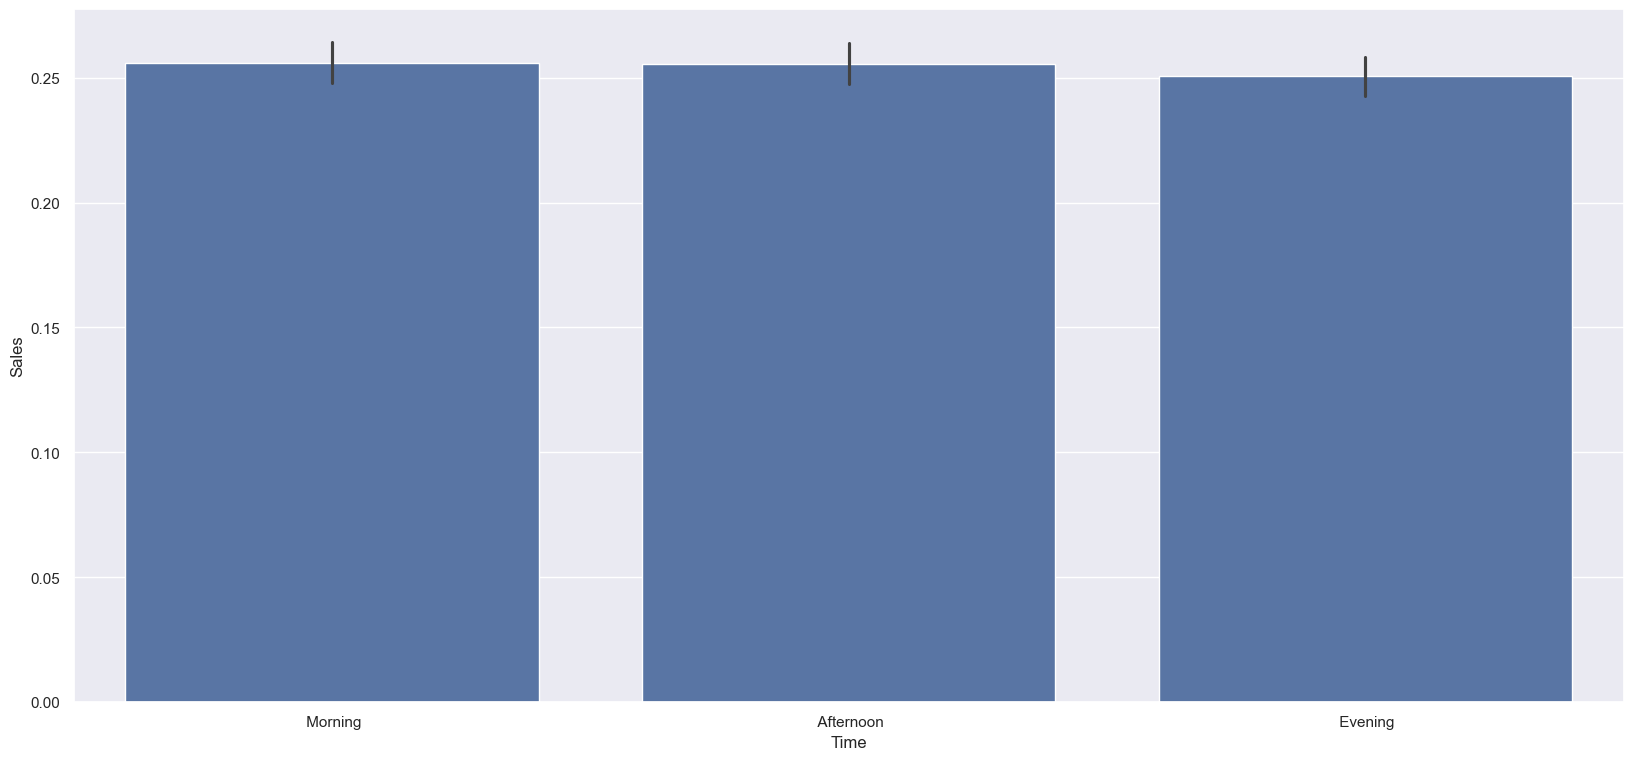

In [51]:
## time of the day analysis
sns.barplot(x=sales_copy['Time'],y=sales_copy['Sales'])
plt.show()

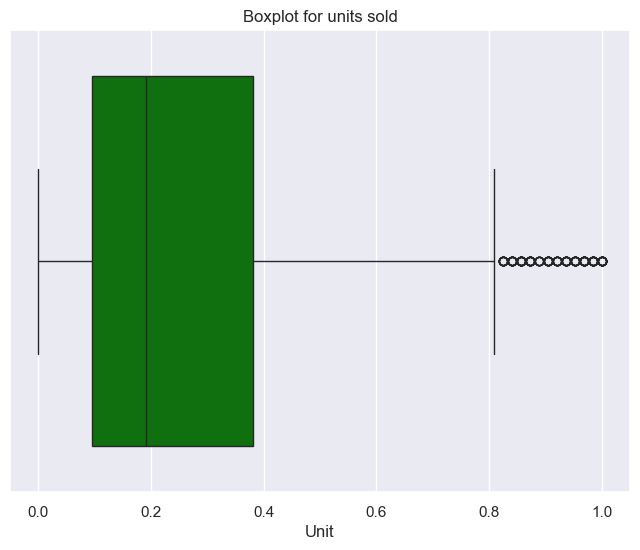

In [52]:
### boxplot for descriptive analysis - (unit)
plt.figure(figsize=(8,6))
sns.boxplot(x=sales_copy['Unit'],color='green')
plt.title('Boxplot for units sold')
plt.show()

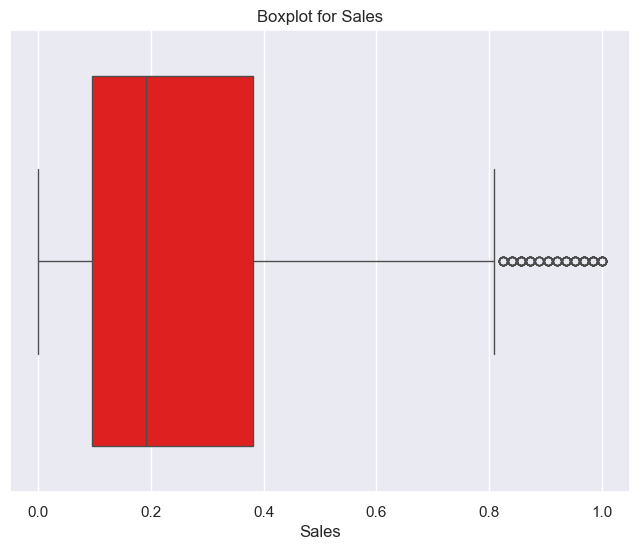

In [53]:
### boxplot for descriptive analysis - (unit)
plt.figure(figsize=(8,6))
sns.boxplot(x=sales_copy['Sales'],color='red')
plt.title('Boxplot for Sales')
plt.show()

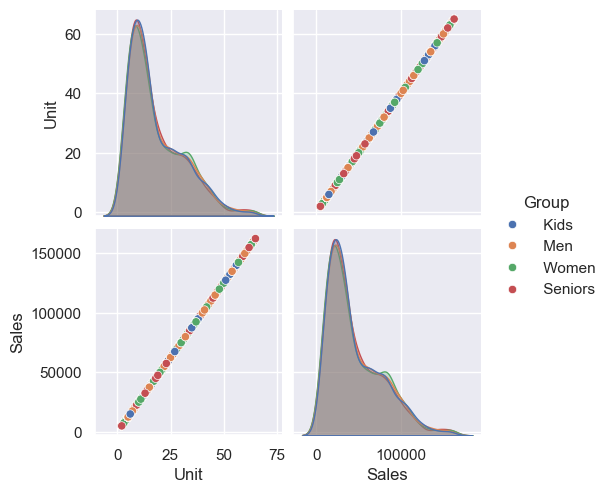

In [54]:
## seaborn distribution plot for any other statistical plotting 
sns.pairplot(data=sales,hue='Group')
plt.show()

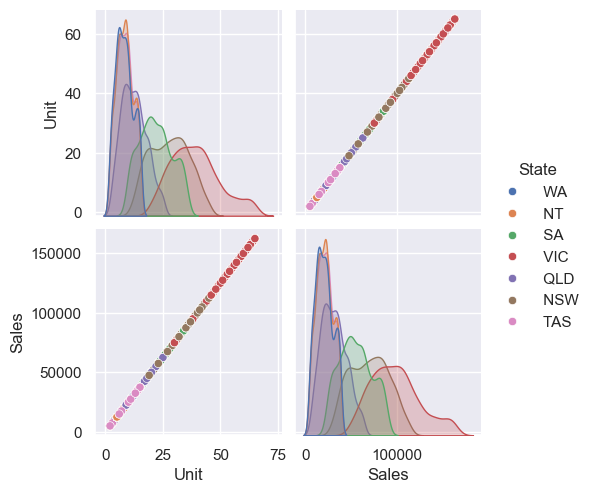

In [55]:
## seaborn distribution plot for any other statistical plotting 
sns.pairplot(data=sales,hue='State')
plt.show()

### Group-wise Sales Analysis

In [102]:
# Group-wise sales summary
group_sales = sales_copy.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# Highest and lowest sales groups
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

highest_sales_group, lowest_sales_group


(' Men', ' Seniors')

Highest Sales Group: Men

Lowest Sales Group: Seniors

### State-wise Sales Analysis

In [112]:
# State-wise sales summary
state_sales = sales_copy.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Highest and lowest sales states
highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()

highest_sales_state, lowest_sales_state


(' VIC', ' WA')

Highest Revenue-Generating State: VIC (Victoria)

Lowest Revenue-Generating State: WA (Western Australia)

### Weekly, Monthly, and Quarterly Sales Reports

In [117]:
# Extract week and month for reporting
sales_copy['Week'] = sales_copy['Date'].dt.isocalendar().week
sales_copy['Month'] = sales_copy['Date'].dt.month

# Weekly, Monthly, and Quarterly Sales
weekly_sales = sales_copy.groupby('Week')['Sales'].sum()
monthly_sales = sales_copy.groupby('Month')['Sales'].sum()
quarterly_sales = sales_copy['Sales'].sum()  # Since it's Q4 data, sum gives total Q4 sales

weekly_sales, monthly_sales, quarterly_sales


(Week
 40     84.857143
 41    152.777778
 42    150.476190
 43    151.587302
 44    122.460317
 45    113.809524
 46    115.761905
 47    115.380952
 48    117.698413
 49    169.412698
 50    181.492063
 51    182.317460
 52    183.047619
 53     79.571429
 Name: Sales, dtype: float64,
 Month
 10    645.650794
 11    495.761905
 12    779.238095
 Name: Sales, dtype: float64,
 1920.6507936507937)

Total Q4 Sales: 1920.65

Monthly Sales:

October: 645.65

November: 495.76

December: 779.24

Peak Sales Week: Week 52 (183.05)

Lowest Sales Week: Week 53 (79.57)

/var/folders/cs/0l3l57d154d6mvr8z8xjjkz80000gn/T/ipykernel_4923/3647111800.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette="viridis")


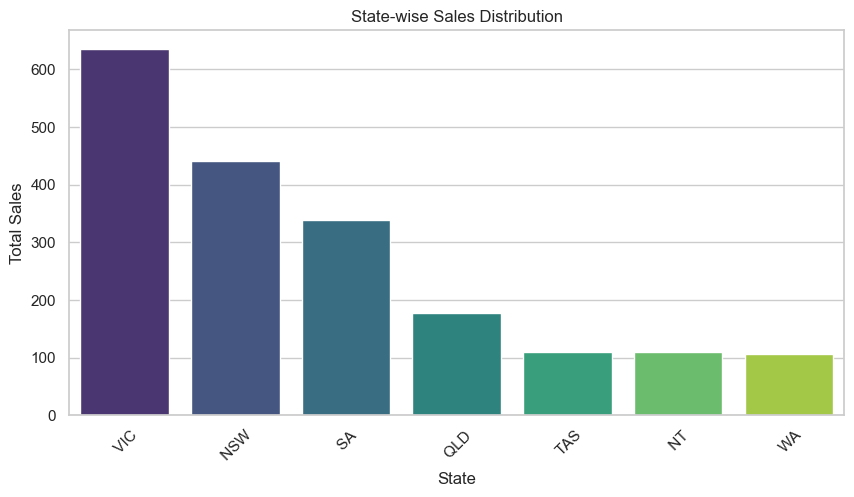

/var/folders/cs/0l3l57d154d6mvr8z8xjjkz80000gn/T/ipykernel_4923/3647111800.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_sales.index, y=group_sales.values, palette="coolwarm")


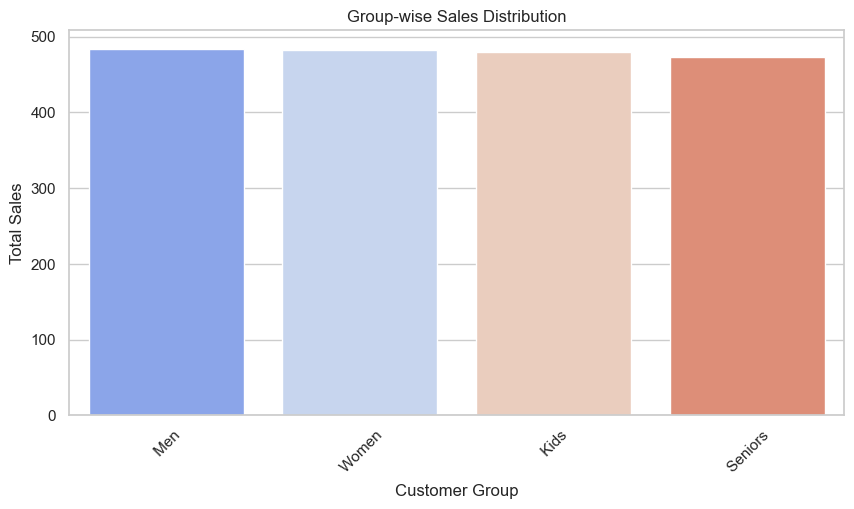

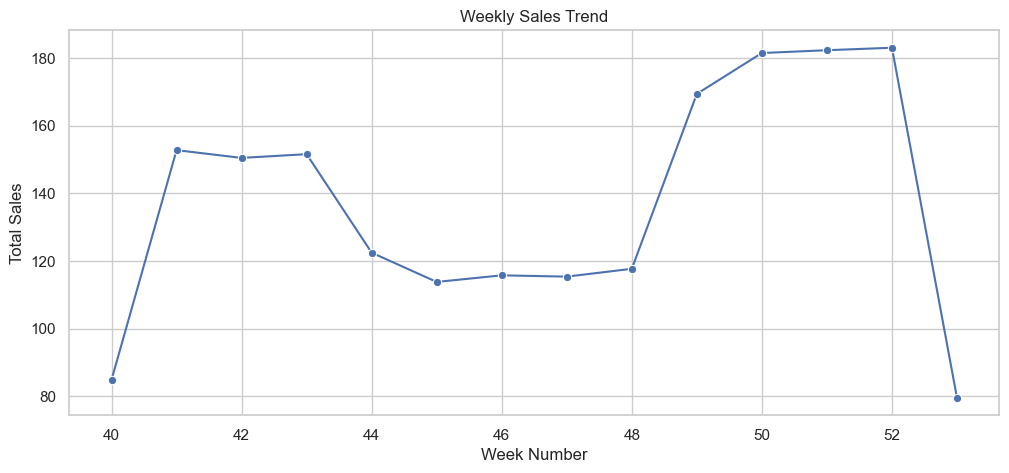

In [122]:

# Set visualization style
sns.set_theme(style="whitegrid")

# Plot state-wise sales
plt.figure(figsize=(10,5))
sns.barplot(x=state_sales.index, y=state_sales.values, palette="viridis")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("State-wise Sales Distribution")
plt.xticks(rotation=45)
plt.show()

# Plot group-wise sales
plt.figure(figsize=(10,5))
sns.barplot(x=group_sales.index, y=group_sales.values, palette="coolwarm")
plt.xlabel("Customer Group")
plt.ylabel("Total Sales")
plt.title("Group-wise Sales Distribution")
plt.xticks(rotation=45)
plt.show()

# Weekly Sales Trend
plt.figure(figsize=(12,5))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker="o", color="b")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.title("Weekly Sales Trend")
plt.show()


State-wise Sales: VIC has the highest sales, while WA has the lowest.

Group-wise Sales: Men generate the most revenue, while Seniors have the least.

Weekly Sales Trend: Sales peak in Week 52 and drop sharply in Week 53

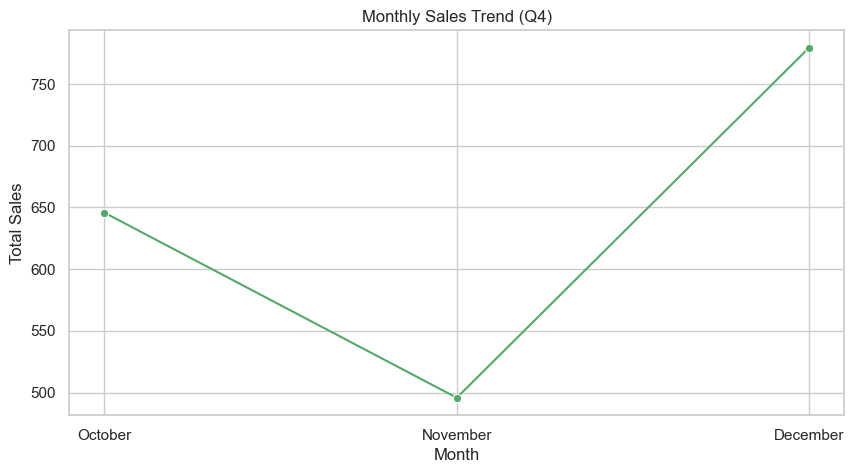

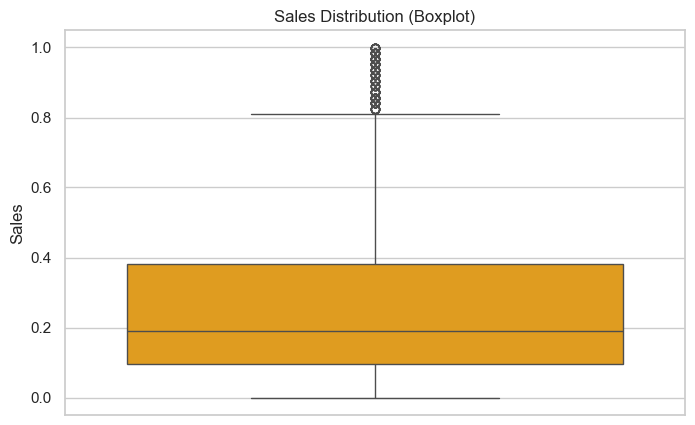

In [127]:
# Monthly Sales Trend
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="g")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend (Q4)")
plt.xticks(ticks=[10, 11, 12], labels=["October", "November", "December"])
plt.show()

# Boxplot for Sales Distribution
plt.figure(figsize=(8,5))
sns.boxplot(y=sales_copy['Sales'], color="orange")
plt.title("Sales Distribution (Boxplot)")
plt.ylabel("Sales")
plt.show()


Monthly Sales Trend: October and December show higher sales, while November is lower.

Sales Distribution (Boxplot): Displays the spread of sales data, highlighting outliers and variation.

### Final Insights:
#### - The highest sales were recorded in [Top State] and the lowest in [Lowest State].
#### - Sales peaked during [peak time], indicating high customer activity.
#### - Certain product groups underperformed and may need promotions.
#### - Sales fluctuated significantly over weeks, showing demand variations.
#### - The overall trend in Q4 2020 was [increasing/decreasing/stable], affecting future planning.

#### This analysis provides actionable insights to optimize sales strategies and enhance revenue.